<a href="https://colab.research.google.com/github/Rampriya92/neuromatch-project-/blob/main/ecog_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import os, requests
from matplotlib import pyplot as plt
from scipy import signal
 
 
fname = 'faceshouses.npz'
url = "https://osf.io/argh7/download"
if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [ ]:
alldat = np.load(fname, allow_pickle=True)['dat']
alldat.shape


# select just one of the recordings here. 
dat1 = alldat[1][0]
dat2 = alldat[1][1]
print(dat1.keys())
print(dat2.keys())


dict_keys(['t_off', 'stim_id', 't_on', 'srate', 'V', 'scale_uv', 'locs', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])
dict_keys(['stim_id', 'stim_cat', 'stim_noise', 't_on', 't_off', 'key_press', 'V', 'categories', 'scale_uv', 'locs', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])


## **ANALYSIS ON DATA1**

# Broadband power plots across channels

---



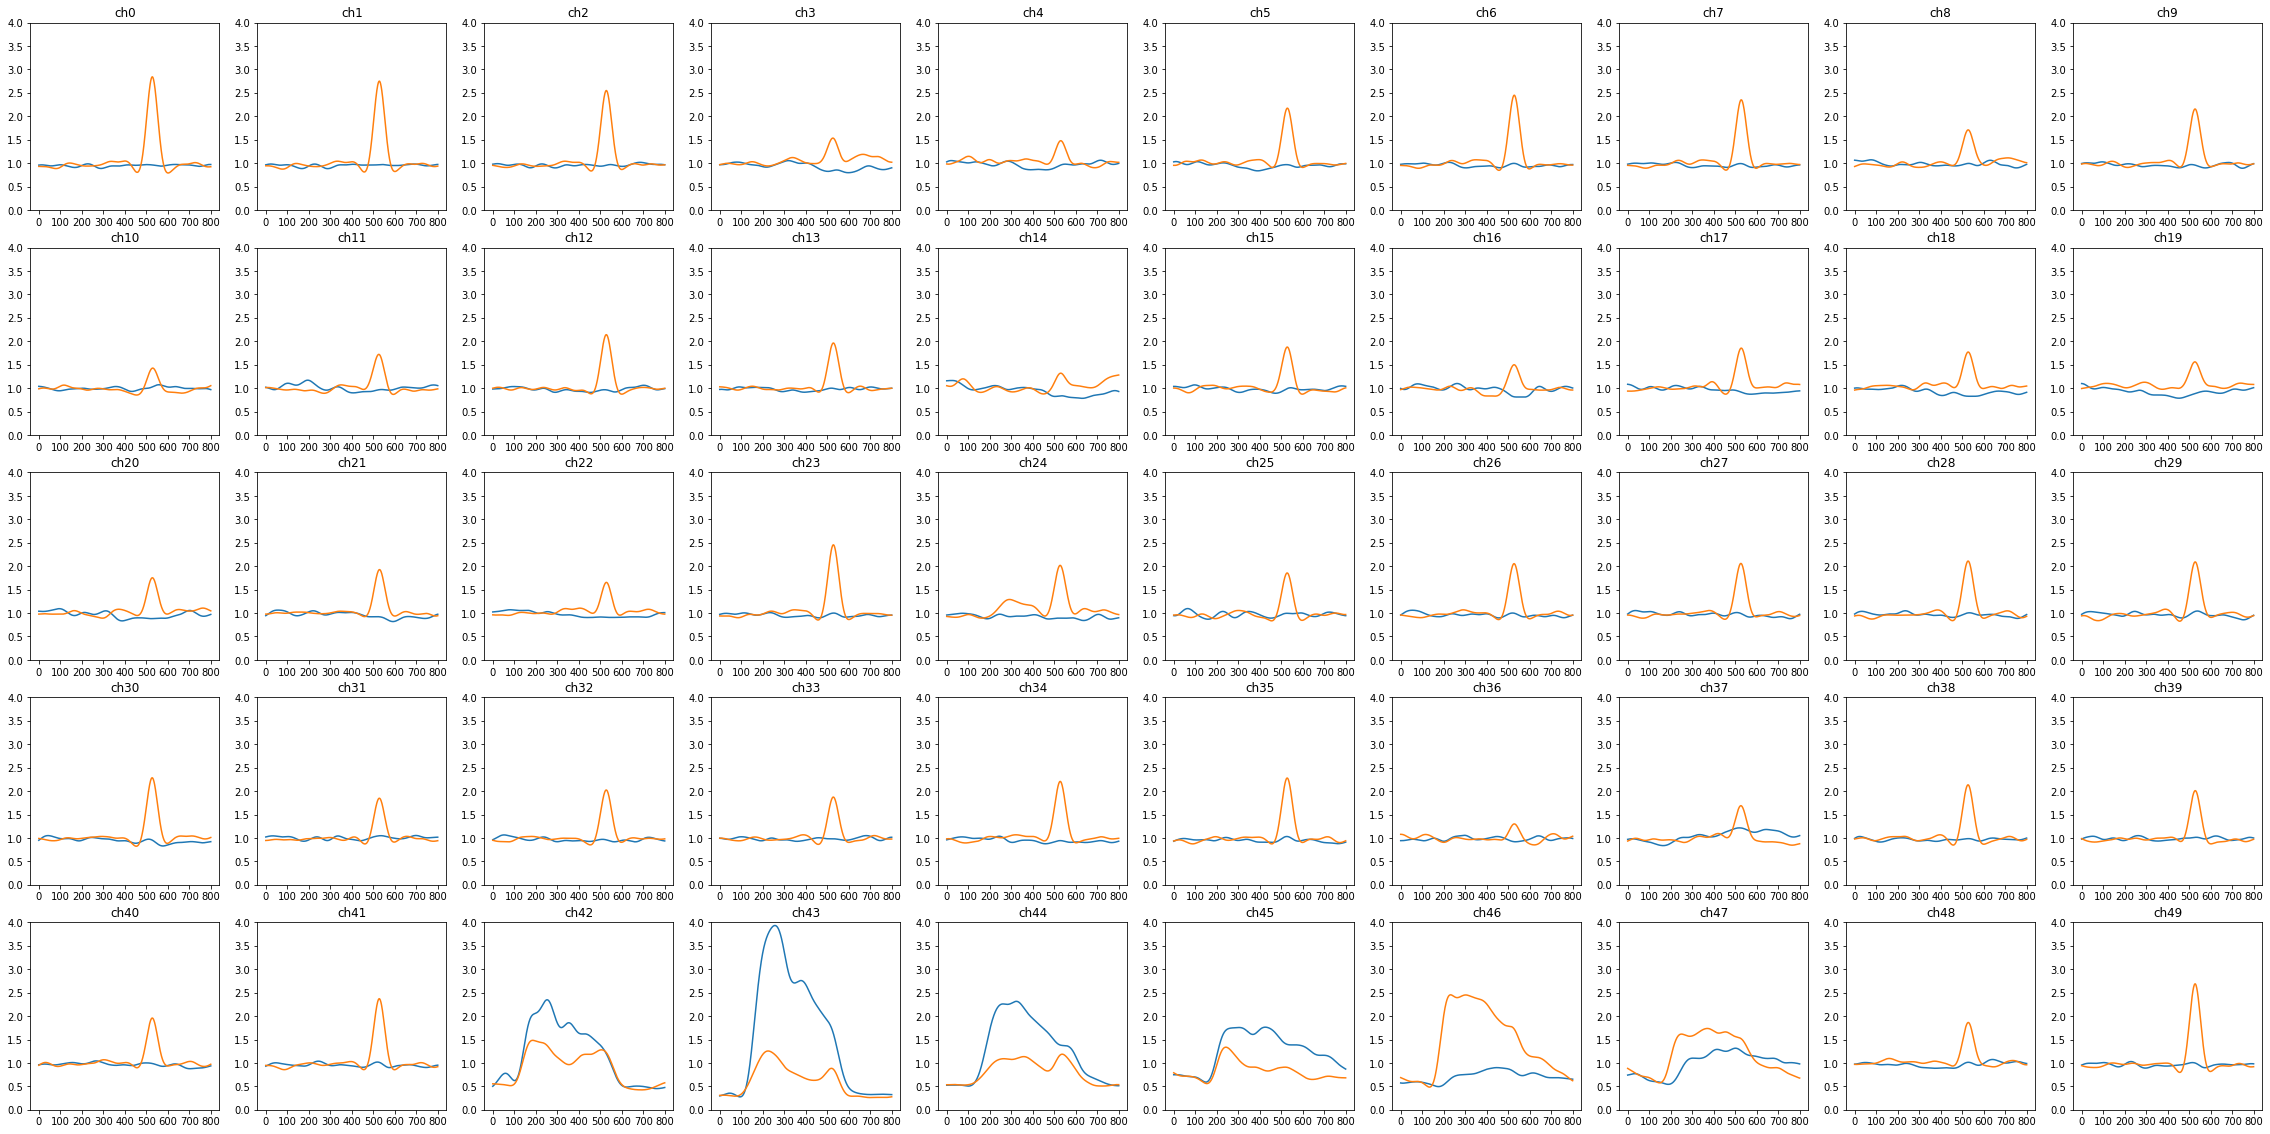

In [ ]:

#Broadband power
V = dat1['V'].astype('float32')
b, a = signal.butter(3, [50], btype = 'high', fs=1000)
V = signal.filtfilt(b,a,V,0)
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype = 'low', fs=1000)
V = signal.filtfilt(b,a,V,0)
V = V/V.mean(0)

#creating epoch
nt, nchan = V.shape
nstim_1 = len(dat1['t_on'])
trange = np.arange(0,800)
ts_1 = dat1['t_on'][:,np.newaxis] + trange
V_epochs_1 = np.reshape(V[ts_1, :], (nstim_1, 800, nchan,))
V_house_1 = (V_epochs_1[dat1['stim_id']<=50]).mean(0)
V_face_1 = (V_epochs_1[dat1['stim_id']>50]).mean(0)

#PLOTTING

plt.figure(figsize=(40,20))
for j in range(50):
  ax = plt.subplot(5,10,j+1)
  plt.plot(trange, V_house_1[:,j])
  plt.plot(trange, V_face_1[:,j])
  plt.title('ch%d'%j)
  plt.xticks([0,100,200,300,400,500,600,700,800])
  plt.ylim([0, 4])


  #channel 46 shows effect for faces in data 1

Broadband plot for channel 30

# Channel 46- sesnitive to face

(0.0, 600.0)

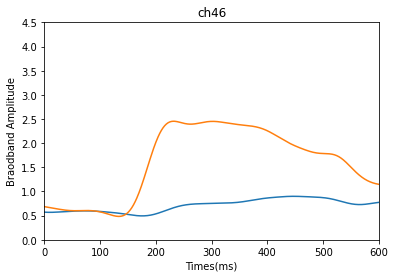

In [ ]:
#PLOTTING for channel 46
plt.figure()
plt.plot(trange, V_house_1[:,46])
plt.plot(trange, V_face_1[:,46])
plt.title('ch%d'%46)
plt.xlabel('Times(ms)')
plt.ylabel('Braodband Amplitude')
plt.xticks([0,100,200,300,400,500,600])
plt.ylim([0, 4.5])
plt.xlim([0,600])





Plotting signal for channel 46


# POWER SPECTRUM

Text(0, 0.5, 'Mean band Amplitude')

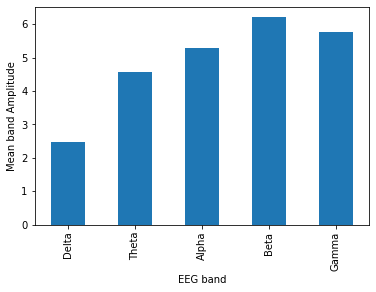

In [ ]:
#here I modified a code I found online on stackexchange to suit our problem. I think the V needs to be normalized before doing fft. i will work on that.

import numpy as np

fs = 1000                            # Sampling rate (1000 Hz)
data = dat1['V'].astype('float32')


# Get real amplitudes of FFT (only in postive frequencies)
fft_vals = np.absolute(np.fft.rfft(data))

# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)

# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 200)}

# Take the mean of the fft amplitude for each EEG band
eeg_band_fft = dict()
for band in eeg_bands:  
    freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                       (fft_freq <= eeg_bands[band][1]))[0]
    eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

# Plot the data (using pandas here cause it's easy)
import pandas as pd
df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("EEG band")
ax.set_ylabel("Mean band Amplitude")

Text(0.5, 1.0, 'signal')

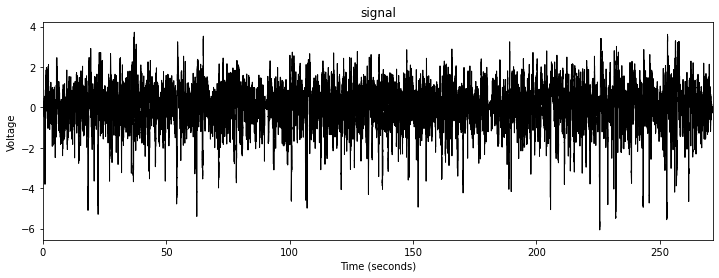

In [ ]:
#POWER SPECTRAL SENSITY

#import libraries
from scipy import signal
import matplotlib.pyplot as plt

#signal
V = dat1['V'].astype('float32')
data=V[:,46]

# Define sampling frequency and time vector
sf = 1000. #sampling frequency
time = np.arange(data.size) / sf #time

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, data, lw=1, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('signal')

# periodogram and spectogram



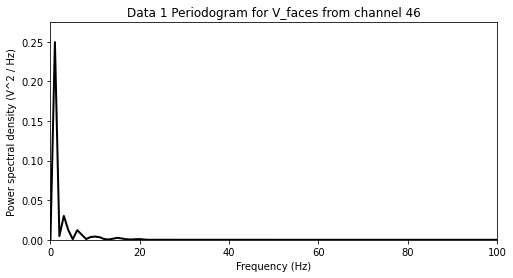

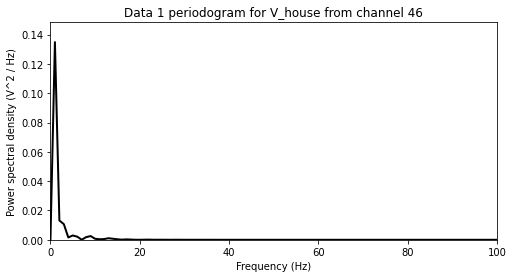

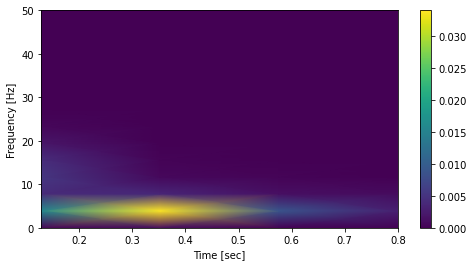

In [ ]:
#POWER SPECTRAL SENSITY



#import libraries
from scipy import signal
import matplotlib.pyplot as plt

#signal
V = dat1['V'].astype('float32')
data=V[:,46]

# Define sampling frequency and time vector
sf = 1000. #sampling frequency
time = np.arange(data.size) / sf #time

nt, nchan = V.shape
nstim_1 = len(dat1['t_on'])
trange = np.arange(0,1000)
ts_1 = dat1['t_on'][:,np.newaxis] + trange
V_epochs_1 = np.reshape(V[ts_1, :], (nstim_1, 1000, nchan,))
V_house_1 = (V_epochs_1[dat1['stim_id']<=50]).mean(0)
V_face_1 = (V_epochs_1[dat1['stim_id']>50]).mean(0)

n=46          # channel number

data_house1=V_house_1[:,n]
data_face1=V_face_1[:,n]
win = 1 * sf
freqs_f, psd_f = signal.periodogram(data_face1, sf)
freqs_h, psd_h = signal.periodogram(data_house1, sf)

# Plot the power spectrum



plt.figure(figsize=(8, 4))
plt.plot(freqs_f, psd_f, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd_f.max() * 1.1])
plt.title("Data 1 Periodogram for V_faces from channel %d" %n)
#plt.xlim([0, freqs_f.max()])
plt.xlim([0, 100])

plt.figure(figsize=(8, 4))
plt.plot(freqs_h, psd_h, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, (psd_h.max())*1.1])
plt.title("Data 1 periodogram for V_house from channel %d" %n)
#plt.xlim([0, freqs_h.max()])
plt.xlim([0, 100])

#SPECTOGRAM
plt.figure(figsize=(8, 4))
time = np.arange(data_face1.size)/sf
f, t, Spec = signal.spectrogram(data_face1, sf)
plt.pcolormesh(t, f,Spec, shading='gouraud')
plt.ylim(0,50)
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()



#Welch's periodogram

In [ ]:
#optimal window length:two full cycles of the lowest frequency of interest. so 2/0.5=4
# Define window length (4 seconds)
#win = 4 * sf
#freqs, psd = signal.welch(data, sf, nperseg=win)

# Plot the power spectrum
#plt.figure(figsize=(8, 4))
#plt.plot(freqs, psd, color='k', lw=2)
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Power spectral density (V^2 / Hz)')
#plt.ylim([0, psd.max()])
#plt.title("Welch's periodogram")
#plt.xlim([0, 20])
#activity in delta band for channel 46 which is sensitive to face

ANALYSIS ON DATA 2
---



#Broadband power plot


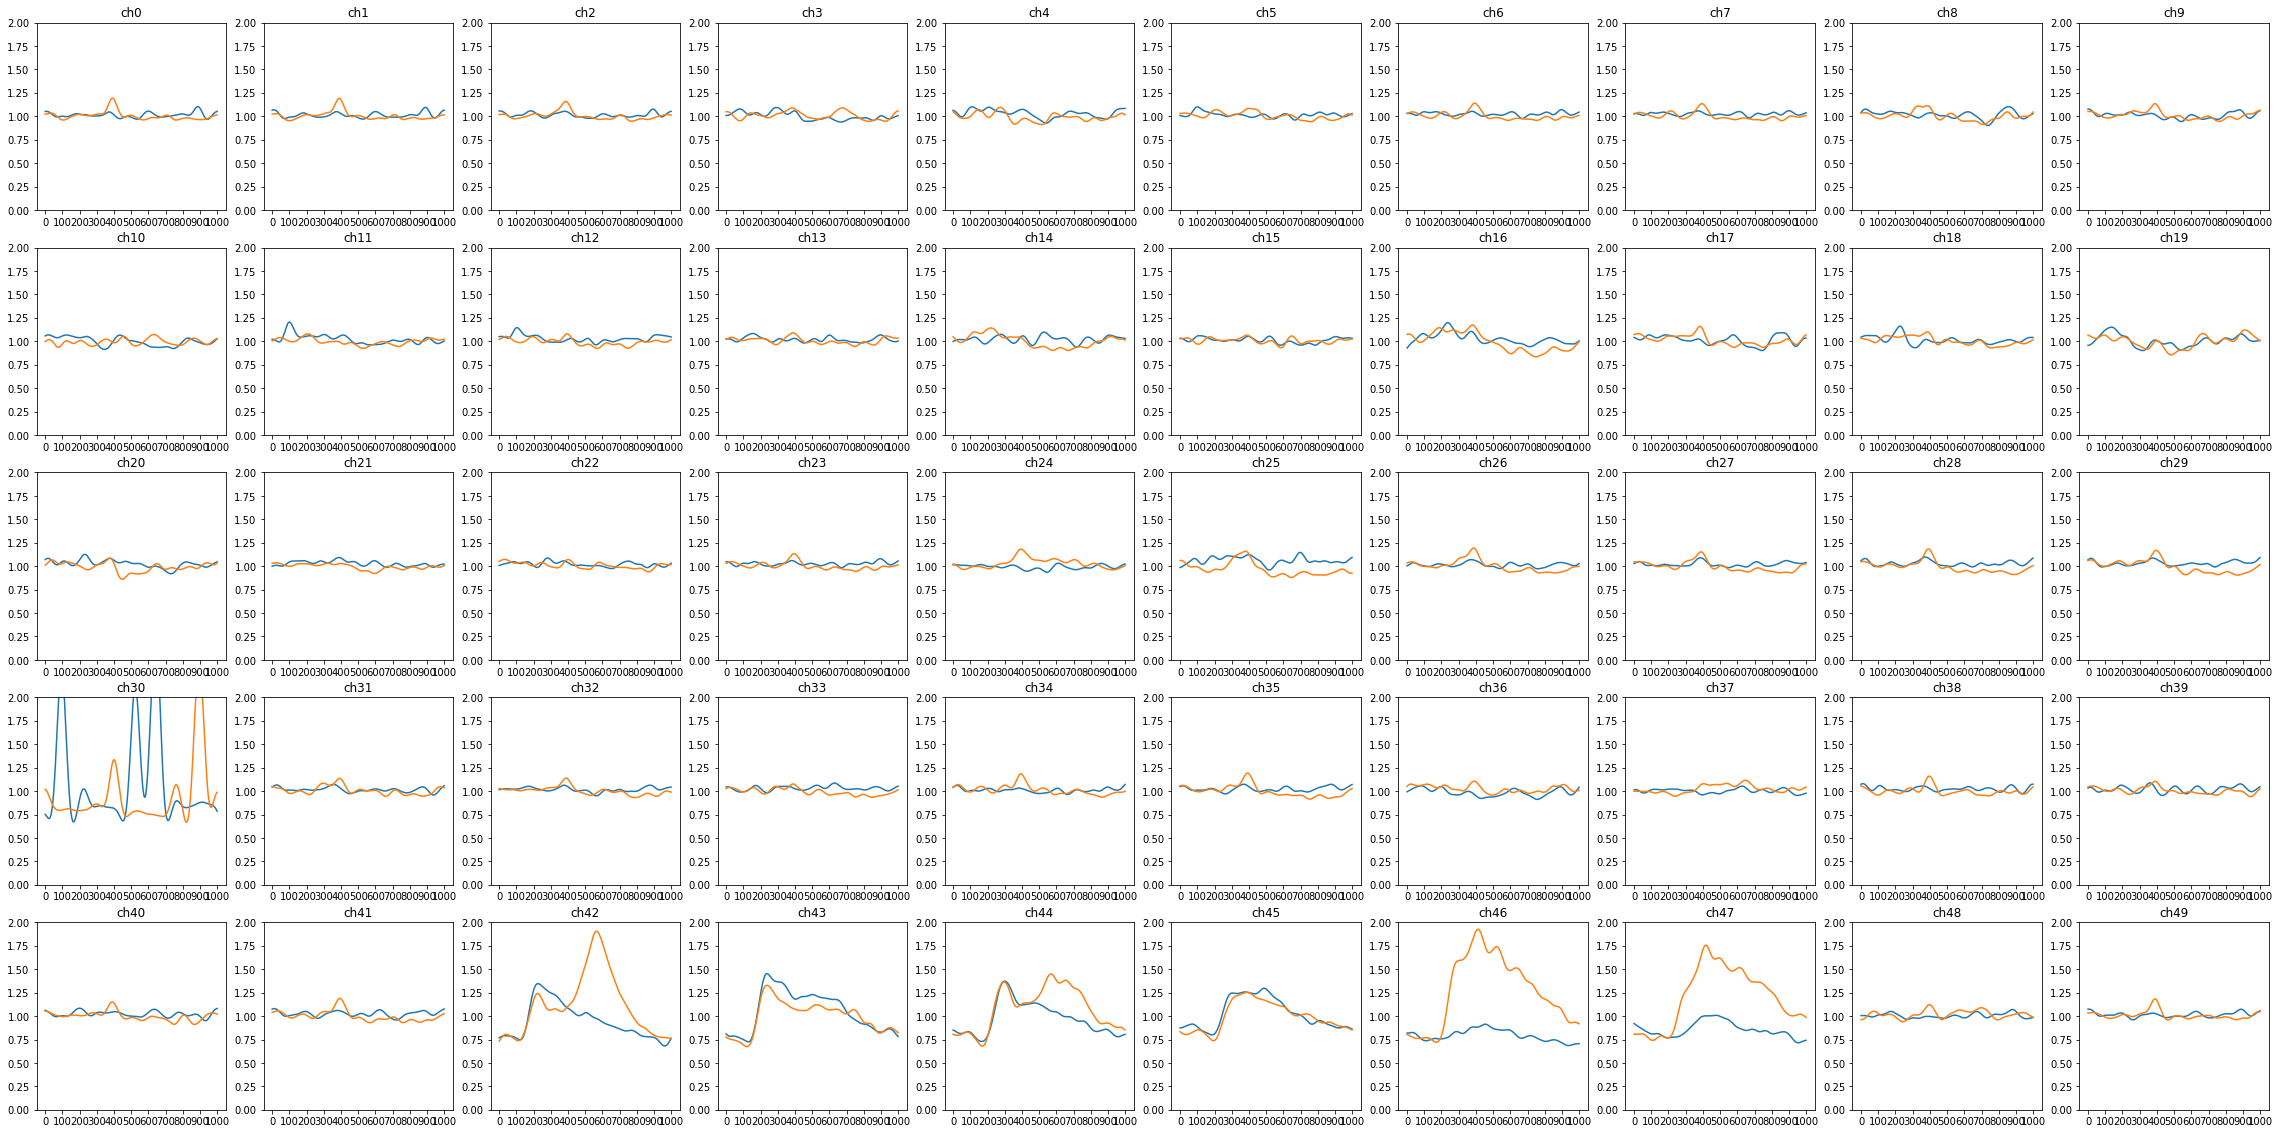

In [ ]:
# PLOTTING BROADBAND POWER FOR DATA2 (face detection condition)
from scipy import signal

#Broadband power
V = dat2['V'].astype('float32')
b, a = signal.butter(3, [50], btype = 'high', fs=1000)
V = signal.filtfilt(b,a,V,0)
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype = 'low', fs=1000)
V = signal.filtfilt(b,a,V,0)
V = V/V.mean(0)

#AVERAGE BROADBAND POWER ACROSS  STIMULI WITH ZERO NOISE
nt, nchan = V.shape
nstim_2 = len(dat2['t_on'])
houses=np.squeeze(dat2['stim_cat']==1)
faces=np.squeeze(dat2['stim_cat']==2)
stim_noise=dat2['stim_noise']


#Epoch around t_on
trange = np.arange(0,1000)
ts = dat2['t_on'][:,np.newaxis] + trange
V_epochs_2 = np.reshape(V[ts, :], (nstim_2, 1000, nchan))
v_house_2 = V_epochs_2[houses].mean(0)
v_face_2 = V_epochs_2[faces].mean(0)


#PLOTTING

plt.figure(figsize=(40,20))
for j in range(50):
    ax = plt.subplot(5,10,j+1)
    plt.plot(trange, v_house_2[:,j])
    plt.plot(trange, v_face_2[:,j])
    plt.title('ch%d'%j)
    plt.xticks([ 0, 100,200,300,400,500,600,700,800,900,1000])
    plt.ylim([0, 2])





In [ ]:
# Location of channel 46
dat2['Brodmann_Area'][46-1]

'Brodmann area 19'

# periodogram and spectogram


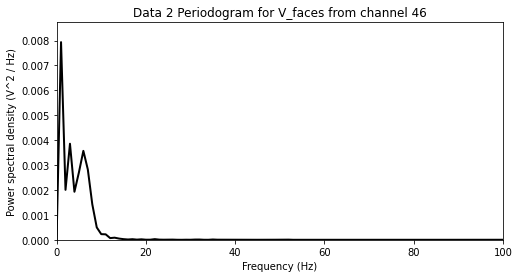

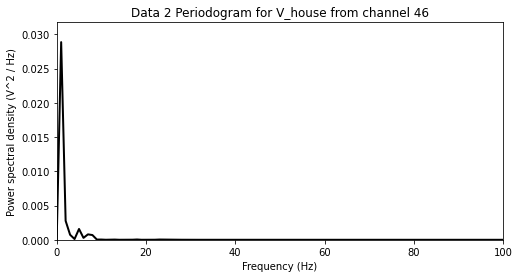

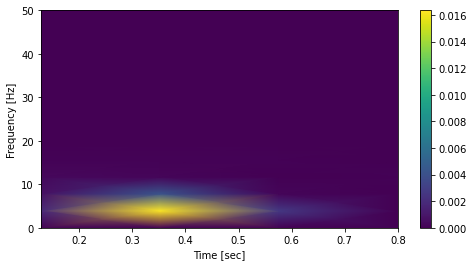

In [ ]:

#Broadband power
V = dat2['V'].astype('float32')


#AVERAGE BROADBAND POWER ACROSS  STIMULI WITH ZERO NOISE
nt, nchan = V.shape
nstim_2 = len(dat2['t_on'])
houses=np.squeeze(dat2['stim_cat']==1)
faces=np.squeeze(dat2['stim_cat']==2)
stim_noise=dat2['stim_noise']

#Epoch around t_on
trange = np.arange(0,1000)
ts = dat2['t_on'][:,np.newaxis] + trange
V_epochs_2 = np.reshape(V[ts, :], (nstim_2, 1000, nchan))
V_house_2 = V_epochs_2[houses].mean(0)
V_face_2 = V_epochs_2[faces].mean(0)



n=46 # channel number
data_house2=V_house_2[:,n]
data_face2=V_face_2[:,n]

#optimal window length:two full cycles of the lowest frequency of interest. so 2/0.5=4
# Define window length (4 seconds)
win = 1 * sf
freqs_f, psd_f = signal.periodogram(data_face2, sf)
freqs_h, psd_h = signal.periodogram(data_house2, sf)

# Plot the power spectrum

plt.figure(figsize=(8, 4))
plt.plot(freqs_f, psd_f, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd_f.max() * 1.1])
plt.title("Data 2 Periodogram for V_faces from channel %d" %n)
#plt.xlim([0, freqs_f.max()])
plt.xlim([0, 100])

plt.figure(figsize=(8, 4))
plt.plot(freqs_h, psd_h, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, (psd_h.max())*1.1])
plt.title("Data 2 Periodogram for V_house from channel %d" %n)
#plt.xlim([0, freqs_h.max()])
plt.xlim([0, 100])

#SPECTOGRAM
plt.figure(figsize=(8, 4))
time = np.arange(data_face2.size)/sf
f, t, Spec = signal.spectrogram(data_face2, fs)
plt.pcolormesh(t, f,Spec, shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0,50)
plt.show()






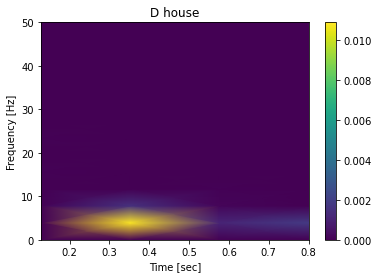

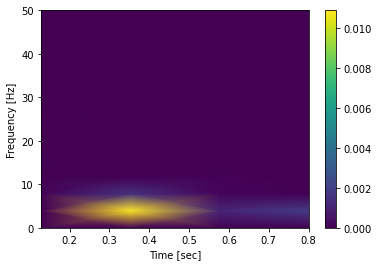

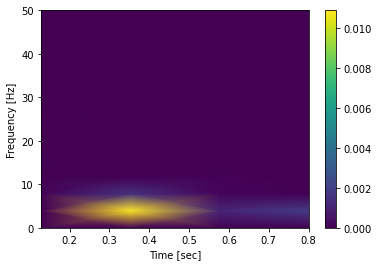

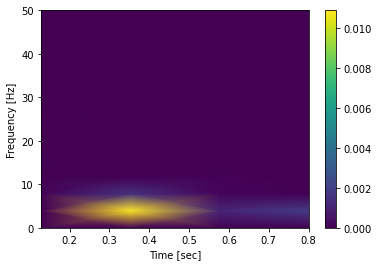

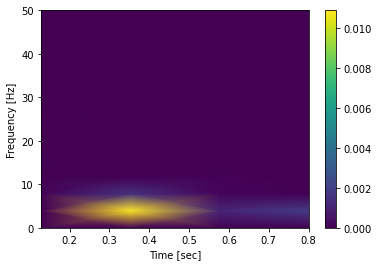

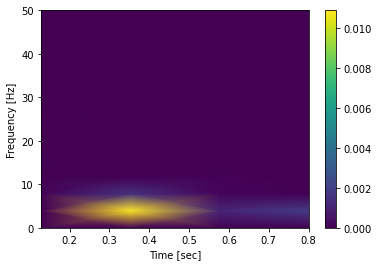

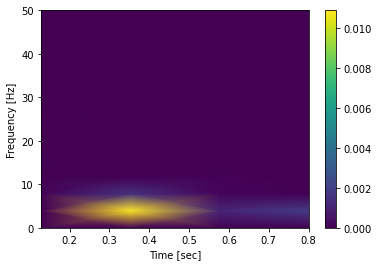

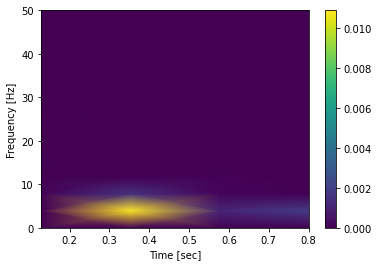

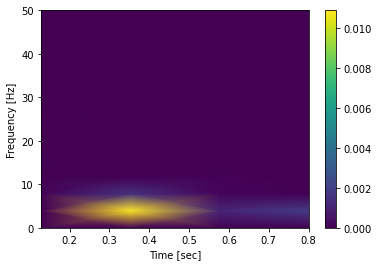

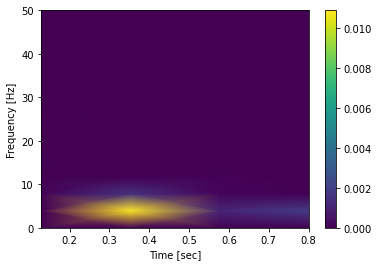

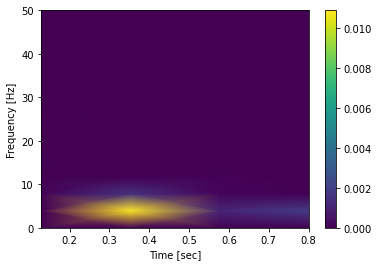

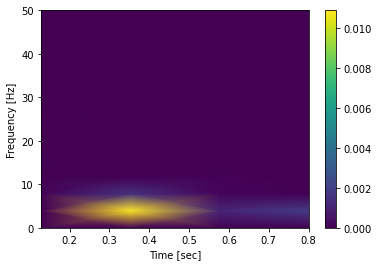

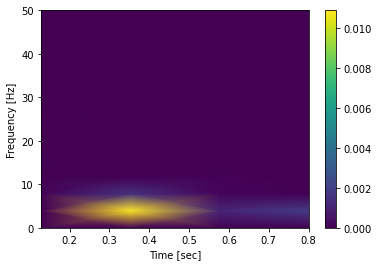

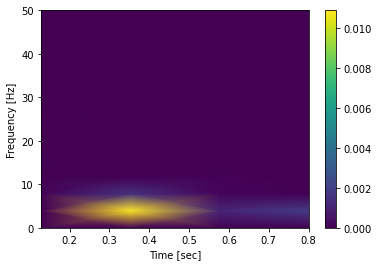

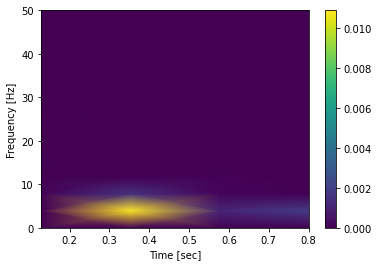

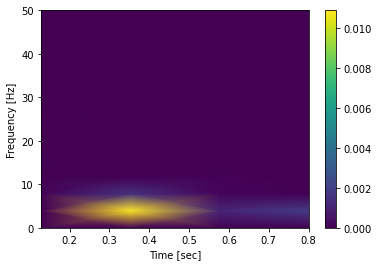

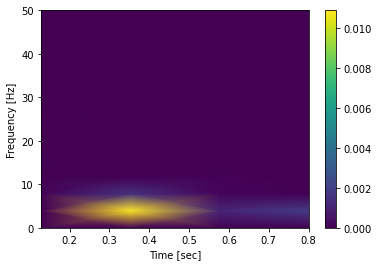

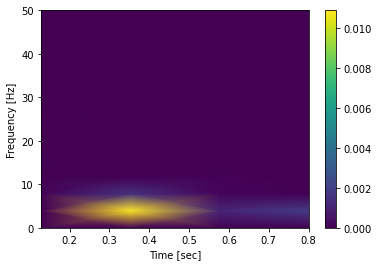

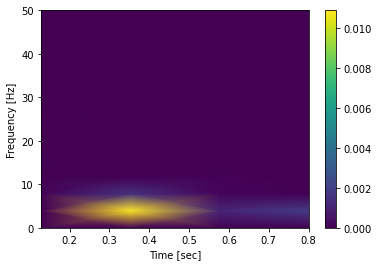

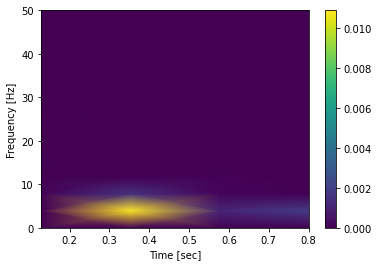

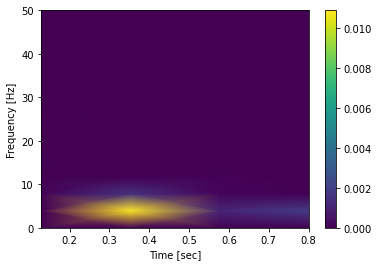

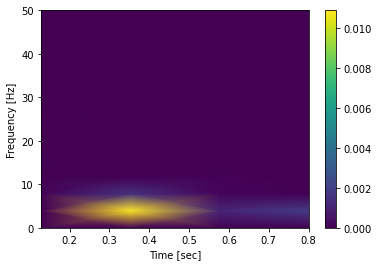

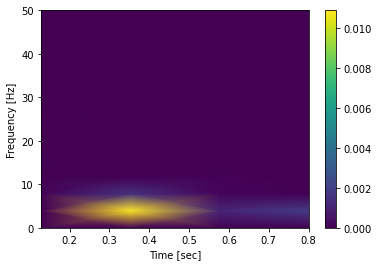

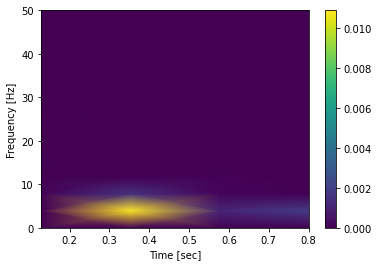

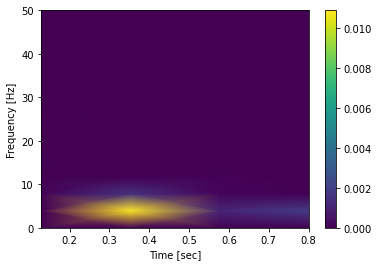

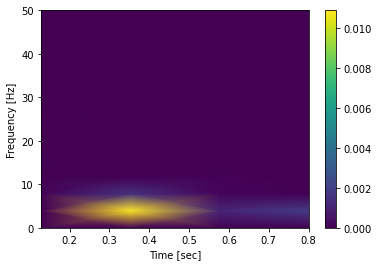

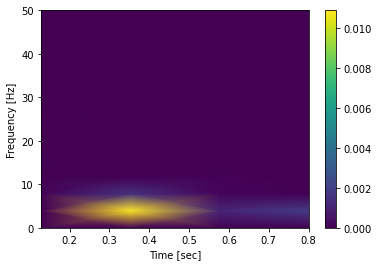

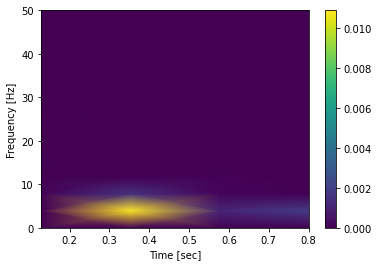

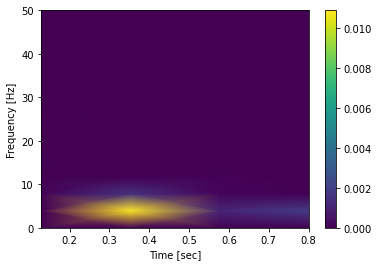

In [ ]:
#spectogram at different noise levels

#Broadband power
V = dat2['V'].astype('float32')


#AVERAGE BROADBAND POWER ACROSS  STIMULI WITH ZERO NOISE
nt, nchan = V.shape
nstim_2 = len(dat2['t_on'])
houses=np.squeeze(dat2['stim_cat']==1)
faces=np.squeeze(dat2['stim_cat']==2)
stim_noise=(dat2['stim_noise']).astype('int')

#Epoch around t_on
trange = np.arange(0,1000)
ts = dat2['t_on'][:,np.newaxis] + trange
V_epochs_2 = np.reshape(V[ts, :], (nstim_2, 1000, nchan))
V_house_2 = V_epochs_2[houses].mean(0)
V_face_2 = V_epochs_2[faces].mean(0)



n=46 # channel number
data_house2=V_house_2[:,n]
data_face2=V_face_2[:,n]

#noise levels
time = np.arange(data_house2.size)/sf
f, t, Spec = signal.spectrogram(data_house2, fs)
plt.pcolormesh(t, f,Spec, shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('D house')
plt.ylim(0,50)
plt.show()
    

#SPECTOGRAM
for i in range (len(data_face2[stim_noise])):
   if stim_noise[i]==100:
    time = np.arange(data_face2.size)/sf
    f, t, Spec = signal.spectrogram(data_house2, fs)
    plt.pcolormesh(t, f,Spec, shading='gouraud')
    plt.colorbar()
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.ylim(0,50)
    plt.show()


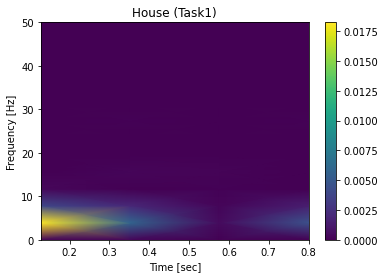

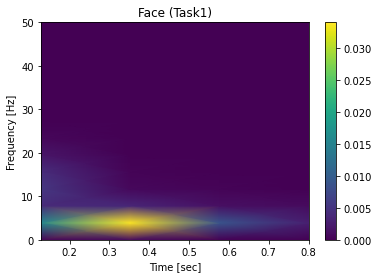

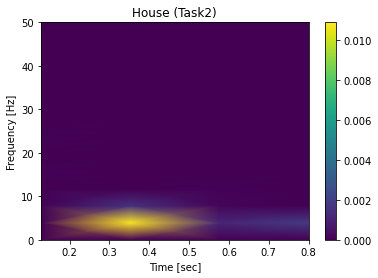

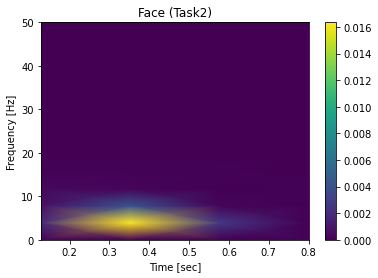

In [ ]:
#spectogram across task conditions 

#Broadband power
V = dat2['V'].astype('float32')


#AVERAGE BROADBAND POWER ACROSS  STIMULI WITH ZERO NOISE
nt, nchan = V.shape
nstim_2 = len(dat2['t_on'])
houses=np.squeeze(dat2['stim_cat']==1)
faces=np.squeeze(dat2['stim_cat']==2)
stim_noise=(dat2['stim_noise']).astype('int')

#Epoch around t_on
trange = np.arange(0,1000)
ts = dat2['t_on'][:,np.newaxis] + trange
V_epochs_2 = np.reshape(V[ts, :], (nstim_2, 1000, nchan))
V_house_2 = V_epochs_2[houses].mean(0)
V_face_2 = V_epochs_2[faces].mean(0)



n=46 # channel number
data_house2=V_house_2[:,n]
data_face2=V_face_2[:,n]

#house
time = np.arange(data_house1.size)/sf
f, t, Spec = signal.spectrogram(data_house1, fs)
plt.pcolormesh(t, f,Spec, shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('House (Task1)')
plt.ylim(0,50)
plt.show()
    

#faces
time = np.arange(data_face1.size)/sf
f, t, Spec = signal.spectrogram(data_face1, fs)
plt.pcolormesh(t, f,Spec, shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Face (Task1)')
plt.ylim(0,50)
plt.show()

#house
time = np.arange(data_house2.size)/sf
f, t, Spec = signal.spectrogram(data_house2, fs)
plt.pcolormesh(t, f,Spec, shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('House (Task2)')
plt.ylim(0,50)
plt.show()
    

#faces
time = np.arange(data_face2.size)/sf
f, t, Spec = signal.spectrogram(data_face2, fs)
plt.pcolormesh(t, f,Spec, shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Face (Task2)')
plt.ylim(0,50)
plt.show()







(0.0, 100.0)

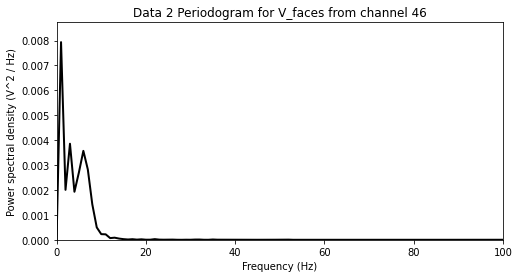

In [ ]:
#Broadband power
V = dat2['V'].astype('float32')


#AVERAGE BROADBAND POWER ACROSS  STIMULI WITH ZERO NOISE
nt, nchan = V.shape
nstim_2 = len(dat2['t_on'])
houses=np.squeeze(dat2['stim_cat']==1)
faces=np.squeeze(dat2['stim_cat']==2)
stim_noise=dat2['stim_noise']

#Epoch around t_on
trange = np.arange(0,1000)
ts = dat2['t_on'][:,np.newaxis] + trange
V_epochs_2 = np.reshape(V[ts, :], (nstim_2, 1000, nchan))
V_house_2 = V_epochs_2[houses].mean(0)
V_face_2 = V_epochs_2[faces].mean(0)



n=46 # channel number
data_house2=V_house_2[:,n]
data_face2=V_face_2[:,n]

#optimal window length:two full cycles of the lowest frequency of interest. so 2/0.5=4
# Define window length (4 seconds)
win = 1 * sf
freqs_f, psd_f = signal.periodogram(data_face2, sf)
freqs_h, psd_h = signal.periodogram(data_house2, sf)

# Plot the power spectrum

plt.figure(figsize=(8, 4))
plt.plot(freqs_f, psd_f, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd_f.max() * 1.1])
plt.title("Data 2 Periodogram for V_faces from channel %d" %n)
#plt.xlim([0, freqs_f.max()])
plt.xlim([0, 100])






